## 01. Import Libraries

In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import plotly.express as px
from fractions import Fraction # Library to calculate fractions
import matplotlib
import folium
import json
import plotly
import plotly.express as px
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## 2. Import your data and conduct any necessary cleaning, manipulations, and reprocessing (such as renaming). 

In [2]:
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

## Import Path & Data Set 

In [3]:
# Project folder shortcut path 
path = r'C:\Users\Gregor\ownCloud\CareerFoundry\6.1\WorldUniversityRankings'

In [4]:
path

'C:\\Users\\Gregor\\ownCloud\\CareerFoundry\\6.1\\WorldUniversityRankings'

In [5]:
# import World University Rankings cleaned data set
df = pd.read_csv(os.path.join(path, 'Prepared Data', 'timesData_cleaned.csv'), index_col = 0)

In [6]:
df

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45 : 55,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3.0,48 : 52,2016
2599,601-800,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,-,31268.0,28.7,2.0,36 : 64,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3.0,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8.0,28 : 72,2016


## Recall from the Exercise that the k-means algorithm can only handle numerical variables, so you’ll need to remove any categorical columns from your data.

In [7]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [8]:
#change the datatype of the female_male_ratio column to float
df['female_male_ratio'] = [str(i).replace(" ", "") for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace("nan", "0")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace("-", "0")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [(str(i).replace(":", "/")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [Fraction(str(i).replace("100/0", "100")) for i in df['female_male_ratio']]
df['female_male_ratio'] = [float(Fraction(str(i).replace("", ""))) for i in df['female_male_ratio']]
df['female_male_ratio']

0       0.000000
1       0.492537
2       0.587302
3       0.724138
4       0.818182
          ...   
2598    0.923077
2599    0.562500
2600    0.000000
2601    0.388889
2602    0.754386
Name: female_male_ratio, Length: 2603, dtype: float64

In [9]:
# Create subset including only data from 2016
df_2016 = df.loc[df['year'] == 2016]
pd.set_option('display.max_rows', 200)
df_2016.shape

(800, 14)

In [10]:
# Create subset including only data from top 200 Universities
df_sub_top200_2016 = df_2016[df_2016['world_rank'].str.len()<5]
df_sub_top200_2016.shape

(200, 14)

In [11]:
pd.set_option('display.max_rows', 10)
df_sub_top200_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,=196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,=196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [12]:
# Delete any '=' in the data set
df_sub_top200_2016['world_rank'] = [(str(i).replace("=", "")) for i in df_sub_top200_2016['world_rank']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\272667305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['world_rank'] = [(str(i).replace("=", "")) for i in df_sub_top200_2016['world_rank']]


In [13]:
df_sub_top200_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [14]:
# Replace any '-' in the data set with '0'
df_sub_top200_2016['world_rank'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['world_rank']]
df_sub_top200_2016['teaching'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['teaching']]
df_sub_top200_2016['international'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['international']]
df_sub_top200_2016['research'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['research']]
df_sub_top200_2016['citations'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['citations']]
df_sub_top200_2016['income'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['income']]
df_sub_top200_2016['total_score'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['total_score']]
df_sub_top200_2016['num_students'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['num_students']]
df_sub_top200_2016['student_staff_ratio'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['student_staff_ratio']]
df_sub_top200_2016['international_students'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['international_students']]
df_sub_top200_2016['female_male_ratio'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['female_male_ratio']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\139661194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['world_rank'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['world_rank']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\139661194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['teaching'] = [float(str(i).replace("-", "0")) for i in df_sub_top200_2016['teaching']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\139661194.py:4: S

In [15]:
df_sub_top200_2016

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196.0,Newcastle University,United Kingdom,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196.0,"St George’s, University of London",United Kingdom,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198.0,University of Trento,Italy,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199.0,Paris Diderot University – Paris 7,France,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


In [16]:
# Replace any 'nan' in the data set with '0'
df_sub_top200_2016['world_rank'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['world_rank']]
df_sub_top200_2016['teaching'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['teaching']]
df_sub_top200_2016['international'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['international']]
df_sub_top200_2016['research'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['research']]
df_sub_top200_2016['citations'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['citations']]
df_sub_top200_2016['income'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['income']]
df_sub_top200_2016['total_score'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['total_score']]
df_sub_top200_2016['num_students'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['num_students']]
df_sub_top200_2016['student_staff_ratio'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['student_staff_ratio']]
df_sub_top200_2016['international_students'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['international_students']]
df_sub_top200_2016['female_male_ratio'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['female_male_ratio']]

C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\1922763395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['world_rank'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['world_rank']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\1922763395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub_top200_2016['teaching'] = [float(str(i).replace("nan", "0")) for i in df_sub_top200_2016['teaching']]
C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\1922763395.

In [17]:
# Create subset including only numerical variables with the columns: world_rank 	teaching 	international 	research 	citations 	income 	total_score 	num_students 	student_staff_ratio 	international_students 	female_male_ratio
df = df_sub_top200_2016[['world_rank', 'teaching', 'international', 'research', 'citations', 'income','total_score','num_students','student_staff_ratio','international_students','female_male_ratio','year']]
df

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016
1804,2.0,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016
1805,3.0,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016
1806,4.0,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016
1807,5.0,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196.0,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016
1999,196.0,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016
2000,198.0,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016
2001,199.0,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016


## 3. Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [18]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [19]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

[-35219642961.42418,
 -13099996667.194937,
 -6563277820.487761,
 -4313325093.229168,
 -2925054704.9468865,
 -1996853635.7156146,
 -1385441766.5412922,
 -1058179780.4652348,
 -846507530.314797]

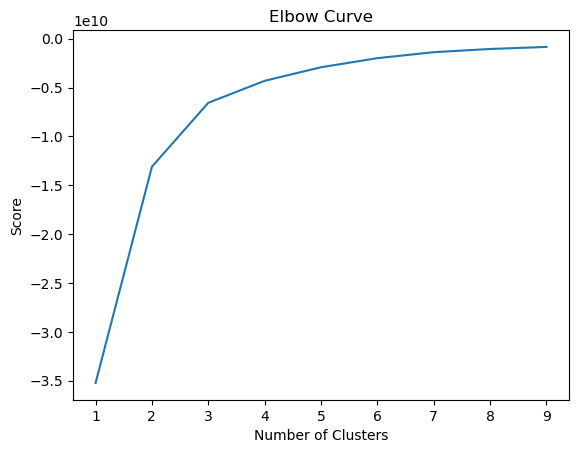

In [20]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 4. Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. 

In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

## 5. Run the k-means algorithm.


In [21]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 


In [22]:
# Fit the k-means object to the data.

kmeans.fit(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

## 6. Attach a new column to your dataframe with the resulting clusters as shown in the Exercise. This will allow you to create a visualization using your clusters.


In [23]:
df['clusters'] = kmeans.fit_predict(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [24]:
df

,world_rank,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,clusters
1803,1.0,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,27.0,0.492537,2016,1
1804,2.0,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,34.0,0.851852,2016,0
1805,3.0,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,22.0,0.724138,2016,1
1806,4.0,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,34.0,0.851852,2016,0
1807,5.0,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,33.0,0.587302,2016,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,196.0,30.9,84.3,27.5,81.5,34.7,49.2,20174.0,15.2,29.0,1.000000,2016,0
1999,196.0,25.6,69.5,18.1,100.0,37.7,49.2,2958.0,13.4,17.0,1.564103,2016,1
2000,198.0,30.8,55.9,27.4,87.7,47.1,49.1,16841.0,43.2,8.0,1.040816,2016,1
2001,199.0,30.5,64.9,22.9,91.0,29.0,48.9,27756.0,14.8,17.0,1.702703,2016,0


In [25]:
df['clusters'].value_counts()

clusters
0    79
1    78
2    43
Name: count, dtype: int64

## 7. Create a few different visualizations (e.g., scatterplots) using your clustered data. Try plotting different variables against each other to see the results in terms of the clusters.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


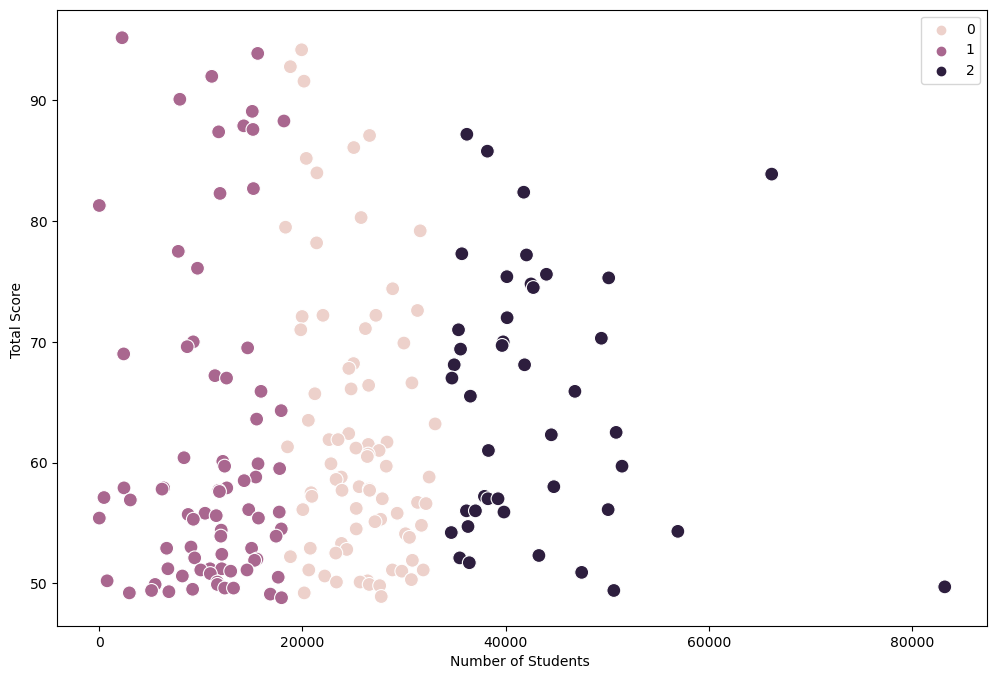

In [26]:
#plot total_score vs num_students

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['num_students'], y=df['total_score'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Students ') # Label x-axis.
plt.ylabel('Total Score ') # Label y-axis.
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


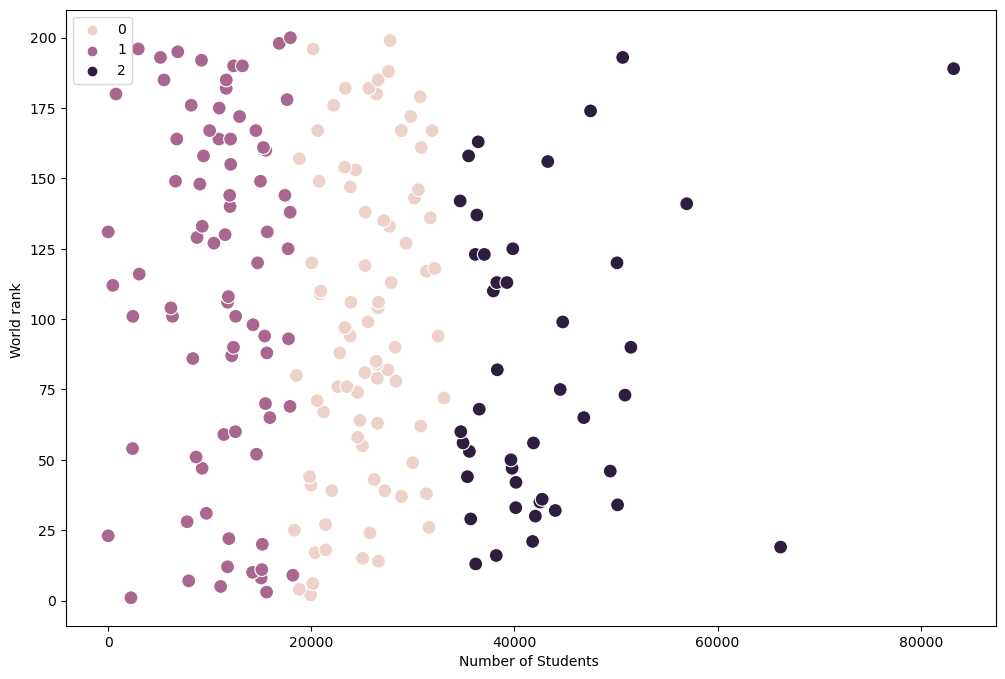

In [27]:
#plot world_rank vs num_students

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['num_students'], y=df['world_rank'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number of Students ') # Label x-axis.
plt.ylabel('World rank ') # Label y-axis.
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


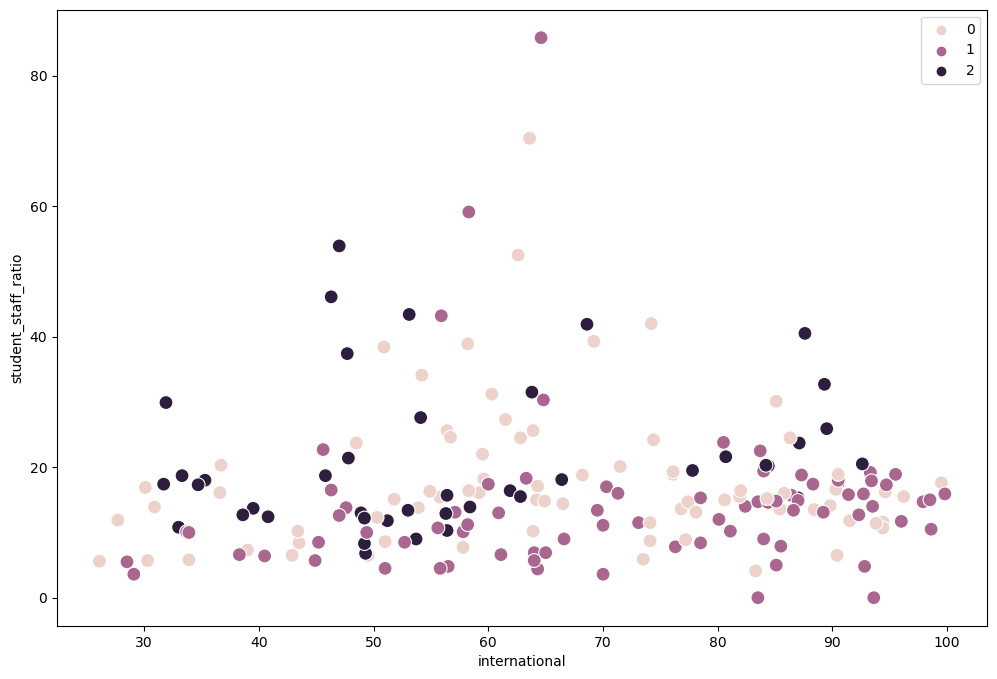

In [28]:
#plot student_staff_ratio vs international

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['international'], y=df['student_staff_ratio'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('international') # Label x-axis.
plt.ylabel('student_staff_ratio') # Label y-axis.
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


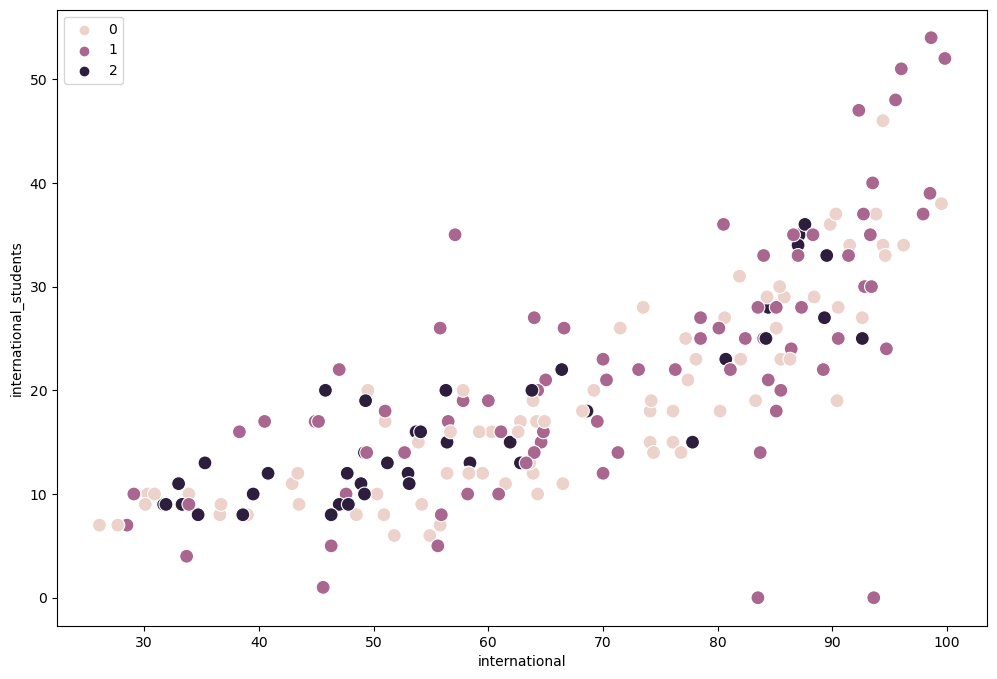

In [29]:
#plot international_students vs international

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['international'], y=df['international_students'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('international') # Label x-axis.
plt.ylabel('international_students') # Label y-axis.
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


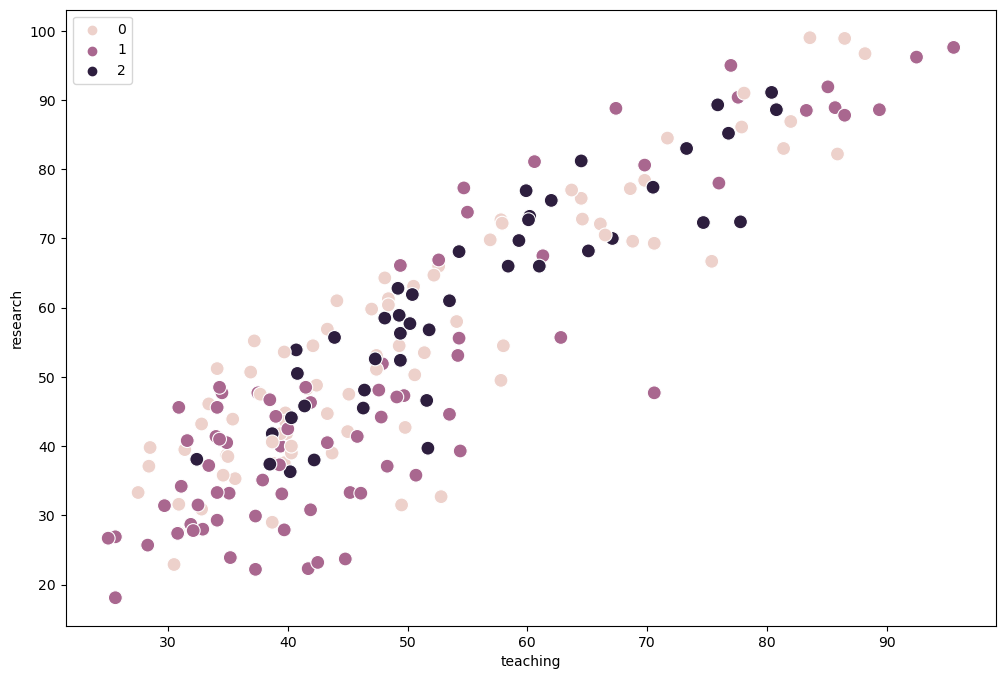

In [30]:
#plot teaching vs research

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['teaching'], y=df['research'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('teaching') # Label x-axis.
plt.ylabel('research') # Label y-axis.
plt.show()

## 8. Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further.

As can be observed in the plots containing the total number of students, i.e., num_students, the clusters make sense in that they are clustered in three groups according to the number of students. The first cluster, in medium purple (coded as “1” in the legend), contains the points with a student number ranging from 0 to approximately 20000. The second cluster, in pink (coded as “0” in the legend), includes points with with a student count above 20000 and below 35000. The third cluster, in dark purple (coded as “2” in the legend), represents Universities with the highest number of students, i.e., where the student count exceeds 35000. The top 10 Universities have a student count below 35000 which is why only data points from the clusters 0 and 1 are present in the bottome left of the plot world_rank vs. num_students. This shows that there are no universities with more than 35000 students in the best rated universities. Similarly, when looking at the research vs. teaching plot, most of the data points from the third cluster (2-dark purple) have a teaching and research rating above 40. This means, that while the very large Universities do not have the best scores in terms of teaching and research, they also do not have the lowest scores.

## 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [31]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\Gregor\AppData\Local\Temp\ipykernel_15212\4155924145.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [33]:
df.groupby('cluster').agg({
    'world_rank':['mean','median'],
    'total_score':['mean','median'],
    'teaching':['mean','median'],
    'research':['mean','median'],
    'international':['mean','median'],
    'num_students':['mean','median']
})

world_rank        total_score          teaching         \
                   mean median        mean median       mean median   
cluster                                                               
dark purple   83.348837   68.0   64.986047   65.5  55.251163   51.7   
pink          97.696203   94.0   62.430380   58.8  50.075949   47.0   
purple       111.371795  122.5   61.251282   56.0  47.669231   41.9   

              research        international         num_students           
                  mean median          mean median          mean   median  
cluster                                                                    
dark purple  61.562791  61.00     58.530233   53.7  42962.767442  40128.0  
pink         55.243038  51.20     66.756962   64.9  25421.721519  25581.0  
purple       48.329487  41.95     71.374359   72.2  11056.358974  11795.0

While the mean and median values show that on average the teaching, research and total_score variables are highest in the dark purple cluster with the largest number of students, we have seen in the world_rank vs. num_students plot that the top 10 Universities are acutally in the pink and purple cluster with significantly less students than the mean/median of the dark purple cluster. On the other hand, we have seen in the research vs. teaching plot that the Universities from the dark purple cluster do not have a rating score below 35 in these performance indicators. Therefore, it makes sense that on average the dark purple cluster has the highest total score or the lowest world_rank value, which corresponds to a higher overall rating.

## 10. Propose what these results could be useful for in future steps of an analytics pipeline.

If some data points within a cluster significantly deviate from the cluster's mean or median, it could signal unusual cases that require further investigation. This can prompt additional analysis and new hypothesi.s The findings can help better understand the characteristics of each cluster. Clusters can also help to monitor changes over time. This can enable to compare whether certain variables within each cluster improves or deterioratates in key areas. In general the results of cluster analysis can be a foundation for a wide range of applications and decision-making processes in various domains, including business, marketing, public policy, healthcare.